<h1> Проект по A/B анализу интернет-магазина </h1> 

<b>Задачи</b><br>
Используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами<br>

<b>Описание проекта</b><br>

<b>Контекст</b><br>

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.  <br>

<b>Часть 1. Приоритизация гипотез.</b><br>

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.<br>

<b>Задача</b><br>
* 1.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<br>
* 1.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<br>
* 1.3 Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.<br>   

<b>Часть 2. Анализ A/B-теста</b>
В результате A/B-теста мы получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.<br>

<b>Задача</b><br>
Проанализируровать A/B-тест:<br>


<b>Описание данных</b><br>
Данные для первой части<br>
Файл /datasets/hypothesis.csv.<br>
Hypothesis — краткое описание гипотезы;<br>
Reach — охват пользователей по 10-балльной шкале;<br>
Impact — влияние на пользователей по 10-балльной шкале;<br>
Confidence — уверенность в гипотезе по 10-балльной шкале;<br>
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.<br>
Данные для второй части<br>
Файл /datasets/orders.csv. <br>
transactionId — идентификатор заказа;<br>
visitorId — идентификатор пользователя, совершившего заказ;<br>
date — дата, когда был совершён заказ;<br>
revenue — выручка заказа;<br>
group — группа A/B-теста, в которую попал заказ.<br>
Файл /datasets/visitors.csv. Скачать датасет<br>
date — дата;<br>
group — группа A/B-теста;<br>
visitors — количество пользователей в указанную дату в указанной группе A/B-теста<br>

## часть: Приоритизация гипотез.

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# Загружаем файл гипотиз
 data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [3]:
# приведем названия колонок к удобному виду
data.columns = data.columns.str.lower()
pd.options.display.max_colwidth=400
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']
display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [5]:
print('Наиболее перспективыне гипотезы')
display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False).head(4))

Наиболее перспективыне гипотезы


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']
display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [7]:
print('Наиболее перспективыне гипотезы')
display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False).head(4))

Наиболее перспективыне гипотезы


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0


### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

При применении фреймворка ICE лидеры гипотезы  8,0,7,6.<br> 
При применении фреймворка RICE лидеры гипотезы 7,2,0,6.<br>
При применении обоих методов видим в числе лидеров гипотезы 0,6,7.<br>
После применения фраймеворка RICE на первом месте оказалась гипотеза номер 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Смена лидера обусловлена большим значением параметра Reach=10 (это парметр охвата пользоватлей по 10 бальной шкале), в то время как у дригих гипотез он меньше.

## часть: Анализ A/B-теста

In [8]:
# Загрузим данные для 2й части
try: 
    orders  = pd.read_csv('/datasets/orders.csv', sep=',')   # данные по заказам 
    visitors= pd.read_csv('/datasets/visitors.csv', sep=',') # данные по посетителям
except:
    orders   = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')    
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',') 

In [9]:
# изучим orders
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.duplicated().sum()

0

Пропусков нет, полных дубликатов нет. Столбец даты имеет неверный формат, изменим его

In [12]:
orders['date'] = pd.to_datetime(orders['date'])

In [13]:
# изучим visitors
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors.duplicated().sum()

0

Пропусков нет, полных дубликатов нет. Дата также имеет неверный формат, изменим ее:

In [16]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [17]:
# проверим дублирование пользоватлей в группах
dubli=orders.groupby('visitorId').agg({'group': pd.Series.nunique}).query('group == 2').count()
proc=round(int(dubli)/orders.shape[0]*100,2)
print('Общее количество пользоватлей', orders.shape[0],'. Входит в обе группы:', int(dubli), 'это составляет', proc,'% от общего числа пользователей'  )


Общее количество пользоватлей 1197 . Входит в обе группы: 58 это составляет 4.85 % от общего числа пользователей


In [18]:
# сощдадим список и отфильтруем по нему
dubli2=orders.groupby('visitorId').agg({'group': pd.Series.nunique}).query('group == 2').drop(columns=['group'])
dubli2=dubli2.index.tolist()
orders=orders.query('visitorId not in @dubli2')

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [19]:
# массив уникальных пар значений дат и групп 
datesGroups=orders[['date','group']].drop_duplicates()
# кумулятивные данные о заказах по дням  
ordersAgg = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],orders['group'] == x['group'])]
            .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),
            axis=1).sort_values(by=['date','group']))
# кумулятивные данные о посетителях интернет-магазина по дням  
visitorsAgg = (datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
    visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
                                 axis=1).sort_values(by=['date','group']))
# объединяем кумулятивные данные в единую таблицу
cumulative = ordersAgg.merge(visitorsAgg, left_on=['date', 'group'], right_on=['date', 'group'])
# переименовываем названия колонок
cumulative.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


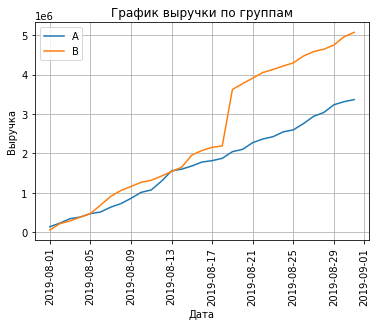

In [20]:
# строим графики выручки по группам
# выделяем данные кумулятивной выручкой по дням в группе А
cumulativeA=cumulative[cumulative['group']=='A'][['date','revenue', 'orders']]
# выделяем данные кумулятивной выручкой по дням в группе В
cumulativeB=cumulative[cumulative['group']=='B'][['date','revenue', 'orders']]
# график выручки группы А
plt.plot(cumulativeA['date'], cumulativeA['revenue'], label='A')
# график выручки группы B
plt.plot(cumulativeB['date'], cumulativeB['revenue'], label='B')
plt.legend()
plt.grid()
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation = 90)
plt.title('График выручки по группам')
plt.show()


Выручка почти равномерно увеличивается в течение всего теста, но примерно с 2019-08-17 выручка группы В начинает расти быстрее. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

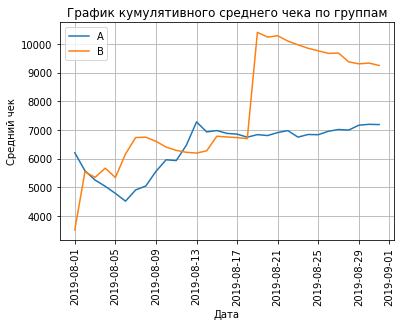

In [21]:
# Для определения среднего чека разделим кумулятивную выручку на кумулятивные заказы
plt.grid()
plt.plot(cumulativeA['date'], cumulativeA['revenue']/cumulativeA['orders'], label = 'A')
plt.plot(cumulativeB['date'], cumulativeB['revenue']/cumulativeB['orders'], label = 'B')
plt.xticks(rotation = 90)
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.show()

Средний чек группы В растел лучше чем А. На этом графике также виден резкий рост группы B примерно с 2019-08-17. Возможно в выборку попали аномальные значения.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

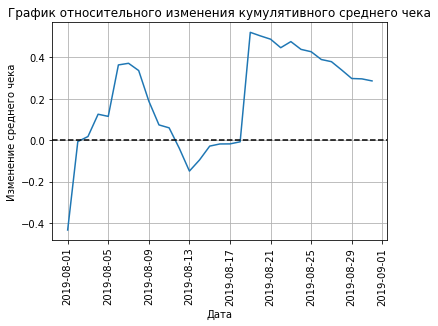

In [22]:
# собираем данные в одной таблице
mergedСumulativeRevenue = cumulativeA.merge(cumulativeB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.plot(mergedСumulativeRevenue['date'], (mergedСumulativeRevenue['revenueB']/mergedСumulativeRevenue['ordersB'])/(mergedСumulativeRevenue['revenueA']/mergedСumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Изменение среднего чека')
plt.xlabel('Дата')
plt.grid()
plt.xticks(rotation = 90)
plt.title('График относительного изменения кумулятивного среднего чека')
plt.show()

В нексольких точках график резко меняется, значит уж точно спрятались крупные заказы и выбросы! 

### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

,date,group,orders,buyers,revenue,visitors,srednee
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772
...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708,0.028801
58,2019-08-30,A,460,437,3311413,18037,0.025503
59,2019-08-30,B,531,511,4955833,18198,0.029179
60,2019-08-31,A,468,445,3364656,18736,0.024979


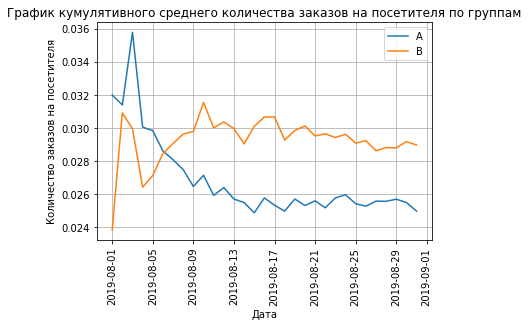

In [23]:
# Для определения  среднего количества заказов на посетителя делим количество заказав на количество посетителей по группам
cumulative['srednee'] = cumulative['orders']/cumulative['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulative[cumulative['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulative[cumulative['group']=='B']
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['srednee'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['srednee'], label='B')
plt.legend()
plt.grid()
plt.xticks(rotation = 90)
plt.ylabel('Количество заказов на посетителя')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
cumulative

Графики после пересечения стали почти симетричными, количество заказов на посетителя в группе В стабильно выше группы А

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

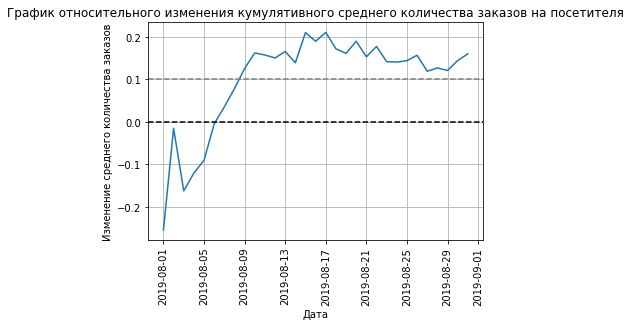

In [24]:
# собираем данные в одной таблице
mergedCumulativeConversions = ( cumulativeDataA[['date','srednee']].merge(cumulativeDataB[['date','srednee']], 
                                left_on='date', right_on='date', how='left', suffixes=['A', 'B']))
# cтроим отношение средних заказов на посетителя
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['sredneeB']/mergedCumulativeConversions['sredneeA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.ylabel('Изменение среднего количества заказов')
plt.xlabel('Дата')
plt.grid()
plt.xticks(rotation = 90)
plt.show()


В начале теста группа B проигрывала группе A, затем вырвалась вперёд и практически стабилизировалась. 

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

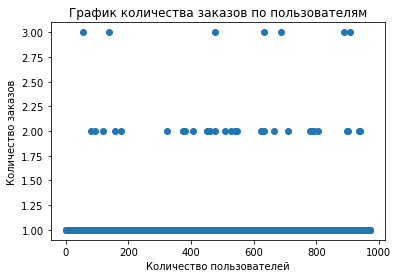

In [25]:
# сгруппируем заказы по посетителю
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
# переименуем колонки
ordersByUsers.columns = ['visitorId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.title('График количества заказов по пользователям')
plt.show()

In [26]:
print('Максимальное число покупок', max(ordersByUsers['orders']))

Максимальное число покупок 3


По графику видно, что оснонове количетво заказов на пользователся 1. Свыше 2х заказов пользоватлей мало и такие значения можно считать анамальными.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [27]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 1% пользователей купили более 4 раз и не более 5% пользоватлей купили более 2х раз. <br>
Выберем нижней границей 3 заказа заказа для определения аномальных пользователей.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

Text(0.5, 1.0, 'точечный график стоимостей заказов')

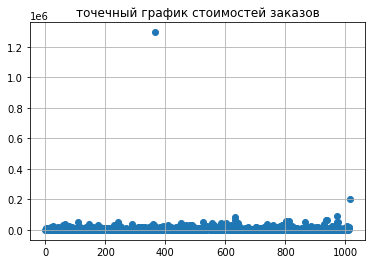

In [28]:
# построим точечный график
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.title('точечный график стоимостей заказов')

In [29]:
print('Максимальная сумма заказа', max(orders['revenue']), 'руб')

Максимальная сумма заказа 1294500 руб


<AxesSubplot:>

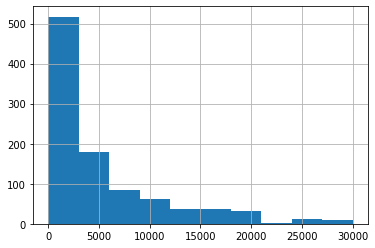

In [30]:
orders['revenue'].hist(bins = 10, range = (0, 30000))

На графике видны экстремальные значения, закупка на сумму более 200 тысяч и даже более 1200000 (1294500 руб). Большее число заказов менее 30000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 1% заказов было на сумму свыше 53904 и не более 5% заказов на сумму 26785. Для нижней границы определения аномальных заказов выберем 26785.

###  Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1,).sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA',]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB',]
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


названия столбцов данных:<br>
date — дата;<br>
ordersPerDateA — количество заказов в выбранную дату в группе A;<br>
revenuePerDateA — суммарная выручка в выбранную дату в группе A;<br>
ordersPerDateB — количество заказов в выбранную дату в группе B;<br>
revenuePerDateB — суммарная выручка в выбранную дату в группе B;<br>
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;<br>
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;<br>
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;<br>
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;<br>
visitorsPerDateA — количество пользователей в выбранную дату в группе A;<br>
visitorsPerDateB — количество пользователей в выбранную дату в группе B;<br>
visitorsCummulativeA  — количество пользователей до выбранной даты включительно в группе A;<br>
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.<br>

In [33]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders'].
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

ordersByUsersA = (orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']
# sampleA и sampleB сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. 
sampleA = ( pd.concat([ordersByUsersA['orders'],pd.Series(0, 
            index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0))

sampleB = ( pd.concat([ordersByUsersB['orders'],pd.Series(0, 
            index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0))

Сформулируем гипотезы.
* Н0: различий в среднем количестве заказов на посетителя между группами нет. 
* Н1: различия в среднем количестве заказов на посетителя между группами есть.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

In [34]:
alpha = 0.05  # критический уровень статистической значимости
results = st.mannwhitneyu(sampleA, sampleB) 
print('По "сырым" данным:')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
    print('p-значение: ', '{0:.3f}'.format(results.pvalue),', это значение < чем 0.5 критический уровень статистической значимости.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 
print('Среднее количестве заказов на посетителя группы B больше среднего группы А на ', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))    

По "сырым" данным:
Отвергаем нулевую гипотезу: разница статистически значима
p-значение:  0.011 , это значение < чем 0.5 критический уровень статистической значимости.
Среднее количестве заказов на посетителя группы B больше среднего группы А на  0.160


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем гипотезы
* Н0: различий в среднем чеке заказа между группами нет
* Н1: различия в среднем чеке заказа между группами есть

In [35]:
alpha = 0.05  # критический уровень статистической значимости
A=orders[orders['group']=='A']['revenue']
B=orders[orders['group']=='B']['revenue']
results = st.mannwhitneyu(A, B)

print('По "сырым" данным:')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('p-значение: ', '{0:.3f}'.format(results.pvalue), ',это значение > чем 0.5 критический уровень статистической значимости.')
    print('Не получилось отвергнуть нулевую гипотезу.') 
    print('Наблюдаемое различие в группе B на ', 
          "{0:.3f}".format(orders[orders['group']=='B']['revenue']
          .mean()/orders[orders['group']=='A']['revenue'].mean()-1),'не является статистически значимым')    

По "сырым" данным:
p-значение:  0.829 ,это значение > чем 0.5 критический уровень статистической значимости.
Не получилось отвергнуть нулевую гипотезу.
Наблюдаемое различие в группе B на  0.287 не является статистически значимым


### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Сначала очистим данные от аномальных значений:

In [36]:
ordersByUsersA = (orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']
orders_lim = np.percentile(ordersByUsers['orders'], 95)
revenue_lim = np.percentile(orders['revenue'], 95)
usersWithManyOrders = pd.concat([
        ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['visitorId'],],axis=0,)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates().sort_values())
#print(abnormalUsers)
print('В данных оказалось всего', abnormalUsers.shape[0],'пользователя с анамальными заказами.') 

В данных оказалось всего 86 пользователя с анамальными заказами.


In [37]:
# Узнаем, как их действия повлияли на результаты теста. 
# Сначала подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [38]:
# Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 
alpha = 0.05  # критический уровень статистической значимости
results=st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('По «очищенным» данным:')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
    print('p-значение: ', '{0:.3f}'.format(results.pvalue), ', это значение < чем 0.5 критический уровень статистической значимости.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')
print('Среднее число заказов группы B отличается среднего группы А на ', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

По «очищенным» данным:
Отвергаем нулевую гипотезу: разница статистически значима
p-значение:  0.016 , это значение < чем 0.5 критический уровень статистической значимости.
Среднее число заказов группы B отличается среднего группы А на  0.174


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [39]:
alpha = 0.05  # критический уровень статистической значимости
A=orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue']
B=orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue']
results = st.mannwhitneyu(A, B)

print('По «очищенным» данным:')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')
    print('p-значение: ', '{0:.3f}'.format(results.pvalue), ', это значение > чем 0.5 критический уровень статистической значимости.')
    print('Средний чек группы B отличается среднего чека группы А на ', "{0:.3f}".format(B.mean()/A.mean()-1), 'но это не является статистически значимым')    

По «очищенным» данным:
Не получилось отвергнуть нулевую гипотезу.
p-значение:  0.727 , это значение > чем 0.5 критический уровень статистической значимости.
Средний чек группы B отличается среднего чека группы А на  -0.034 но это не является статистически значимым


### Примем решение по результатам теста и объясним его. 

Имеющиеся факты:
* Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

На графике среднего количества заказов на посетителя в начале теста группа B проигрывала группе A, затем вырвалась вперёд и практически стабилизировалась.<br>
На графике относительного изменения кумулятивного среднего чека видно преимущество группы В, хотя результат и искажен аномальными покупками ( резкие рывки вверх на графике).<br>
В целом графики различий между группами сообщают, что результаты группы B лучше группы A.<br> 
Исходя из обнаруженных фактов, тест следует остановить и признать его успешным.

<b> Общий вывод </b>


В результате проекта была продела на работа по: <br>
1. Приоритезации гипотез, <br>
в результате выбло выявлено, что при применении фреймворка ICE лидеры гипотезы 8,0,7,6,
а при применении фреймворка RICE лидеры гипотезы 7,2,0,6.  <br>
На первом месте оказалась гипотеза : Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. <br>
2. Анализ А/В теста.<br>
В результате было выявлено:<br>
Выручка почти равномерно увеличивается в течение всего теста, но примерно с 2019-08-17 выручка группы В начинает расти быстрее.<br>
Средний чек группы В растет лучше чем А, также выявлен резкий рост группы B примерно с 2019-08-17. <br>
На графиках были замечены аномалии выраженные резкими скачками, они были обусловлены аномально выскоми заказми (мах чек 1294500 руб), а также покупками отдельных пользователей более 3х раз. (мах число покупок 11).  <br>
Была расчитана статистическая значимость различий в среднем количестве заказов по "сырым" и "чистым" данным, которая показала,
что есть статистически значимое различие по среднему количеству заказов. Преимущество у группы В.<br>
Была расчитана статистическая значимость различий в среднем чеке заказа, статистически значимого различия по среднему чеку между группами не выявилось.<br>
Было принято решение об остановке теста и признании его результатов успешными. Побеждает группа B.
